# HW 04 - Applied ML

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from numpy import unravel_index
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

from sklearn.cluster import KMeans

from sklearn_pandas import DataFrameMapper

In [5]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv', index_col='playerShort')
df.sample(10)

,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,,
daniel-braaten,Daniel Braaten,Toulouse FC,France,25.05.1982,184.0,85.0,Right Winger,1,0,1,...,0.50,1185,34,DNK,0.361010,2254.0,0.000179,0.614484,2306.0,0.000812
dani-alves,Dani Alves,FC Barcelona,Spain,06.05.1983,173.0,64.0,Right Fullback,2,1,1,...,0.25,428,77,PRY,0.359406,40.0,0.009383,0.772727,44.0,0.056498
andrew-surman,Andrew Surman,Norwich City,England,20.08.1986,178.0,72.0,Attacking Midfielder,3,2,1,...,NaN,2299,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
arthur-boka,Arthur Boka,VfB Stuttgart,Germany,02.04.1983,166.0,67.0,Left Fullback,1,1,0,...,1.00,1618,116,ZWE,0.209204,116.0,0.003850,0.188976,127.0,0.023217
anatoliy-tymoshchuk,Anatoliy Tymoshchuk,Bayern München,Germany,30.03.1979,181.0,75.0,Defensive Midfielder,8,3,3,...,0.25,2743,52,RUS,0.398174,526.0,0.000809,1.212727,550.0,0.004521
carlo-nash,Carlo Nash,Stoke City,England,13.09.1973,196.0,89.0,Goalkeeper,4,3,1,...,0.25,1233,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
de-la-bella,De la Bella,Real Sociedad,Spain,02.12.1985,182.0,82.0,Left Fullback,4,4,0,...,0.25,432,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
jerome-rothen,Jérôme Rothen,SC Bastia,France,31.03.1978,177.0,70.0,NaN,4,1,2,...,0.00,2673,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
manucho,Manucho,Real Valladolid,Spain,07.03.1983,187.0,83.0,Center Forward,1,0,1,...,1.00,367,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [295]:
# Remove columns with no rating
df = df.dropna(subset=['rater1', 'rater2'])
df['rating'] = df.rater1 + df.rater2

lim = df.drop(['player',
               'club',
               'leagueCountry',
               'birthday',
               'height',
               'weight',
               'position',
               'rater1',
               'rater2',
               'Alpha_3',
               'photoID'], axis=1)

lim.sample(10)

,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,rating
playerShort,,,,,,,,,,,,,,,,,
maynor-figueroa,4,1,1,2,0,0,1,0,1417,113,0.329121,163.0,0.002656,0.383234,167.0,0.011360,1.75
john-ruddy,2,2,0,0,0,1,0,0,2397,44,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,0.00
arouna-kone,3,0,0,3,0,0,0,0,2081,44,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037,2.00
yaya-toure,1,1,0,0,0,0,0,0,2388,58,0.362720,3219.0,0.000128,0.568785,3351.0,0.000575,2.00
franck-signorino,9,1,5,3,0,2,0,0,2792,7,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586,0.00
michael-krohn-dehli,2,1,1,0,0,0,0,0,434,3,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,0.50
felix-kroos,1,1,0,0,0,0,0,0,3101,8,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,0.00
yassine-el-ghanassi,2,0,1,1,0,0,0,0,1333,64,0.352920,5952.0,0.000070,0.445679,6121.0,0.000269,1.00
louis-saha,2,1,0,1,1,0,0,0,963,58,0.362720,3219.0,0.000128,0.568785,3351.0,0.000575,2.00


In [7]:
X = np.asanyarray(lim[[column for column in lim.columns if column != 'rating']])
y = np.asarray(lim['rating'] * 4, dtype="int")

for col in range(len(X[0])):
    col_mean = np.nanmean(X[:, col])
    X[:, col][np.isnan(X[:, col])] = col_mean

In [8]:
rfc = RandomForestClassifier(
    n_estimators=9,
    criterion='gini',  # or 'entropy' ?
    max_features=None,
    max_depth=5,
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
y_pred = rfc.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.334606496341


In [12]:
rfc.feature_importances_

array([ 0.05258112,  0.03808982,  0.00434799,  0.00371106,  0.0266687 ,
        0.01087818,  0.        ,  0.00071676,  0.0294448 ,  0.09414102,
        0.02305801,  0.05897406,  0.19465508,  0.21362903,  0.03312391,
        0.21598048])

In [297]:
sdf = df.reset_index().groupby('playerShort')

In [298]:
feature_function_mapper = {
    'height': np.average,
    'weight': np.average,
    'victories': np.sum,
    'ties': np.sum,
    'defeats': np.sum,
    'goals': np.sum,
    'yellowCards': np.sum,
    'yellowReds': np.sum,
    'redCards': np.sum,
    'rating': np.average,
    'meanIAT': np.average,
    'nIAT': np.average,
    'seIAT': lambda x: np.sqrt(np.average(np.square(x))),
    'meanExp': np.average,
    'nExp': np.average,
    'seExp': lambda x: np.sqrt(np.average(np.square(x))),
} # meanIAT	nIAT	seIAT	meanExp	nExp	seExp

sdf_agg = sdf.agg(feature_function_mapper)
sdf_agg

,height,nExp,nIAT,meanIAT,meanExp,defeats,weight,ties,redCards,yellowReds,seIAT,victories,yellowCards,rating,goals,seExp
playerShort,,,,,,,,,,,,,,,,
aaron-hughes,182.0,20637.277108,19710.156627,0.346459,0.494575,228,71.0,179,0,0,0.003315,247,19,0.25,9,0.027536
aaron-hunt,183.0,26864.454545,26104.292929,0.348818,0.449220,122,73.0,73,1,0,0.000543,141,42,0.25,62,0.002506
aaron-lennon,165.0,22238.742574,21234.861386,0.345893,0.491482,115,63.0,97,0,0,0.001268,200,11,0.50,31,0.008914
aaron-ramsey,178.0,39719.980769,38285.826923,0.346821,0.514693,68,76.0,42,1,0,0.028116,150,31,0.00,39,0.104541
abdelhamid-el-kaoutari,180.0,2953.837838,2832.351351,0.331600,0.335587,43,73.0,40,2,4,0.006309,41,8,0.50,1,0.023426
abdou-traore_2,180.0,4741.404762,4523.666667,0.320079,0.296562,33,74.0,23,0,1,0.012160,41,11,1.50,3,0.029404
abdoulaye-diallo_2,189.0,2762.500000,2646.700000,0.341625,0.400818,8,80.0,8,0,0,0.000353,8,0,1.75,0,0.001499
abdoulaye-keita_2,188.0,1808.500000,1728.000000,0.355406,0.417225,2,83.0,1,0,0,0.000516,0,0,1.75,0,0.002139
abdoulwhaid-sissoko,180.0,2593.214286,2470.196429,0.348178,0.429630,62,68.0,25,2,0,0.000184,34,21,2.00,3,0.000771


In [15]:
X = np.asanyarray(sdf_agg[[column for column in sdf_agg.columns if column != 'rating']])
y = np.asarray(sdf_agg['rating'] * 4, dtype="int")

for col in range(len(X[0])):
    col_mean = np.nanmean(X[:, col])
    X[:, col][np.isnan(X[:, col])] = col_mean

In [16]:
#Max features for RFC is 15 since rating feature is in y and the remaining 15 features are in X
rfc = RandomForestClassifier(
    n_estimators=9,
    criterion='gini',  # or 'entropy' ?
    max_features=15,
    max_depth=2,
)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [18]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=15, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
y_pred = rfc.predict(X_test)
y_compare = rfc.predict(X_train)
print(sklearn.metrics.accuracy_score(y_test, y_pred), sklearn.metrics.accuracy_score(y_train, y_compare))

0.352644836272 0.357744107744


In [20]:
rfc.feature_importances_

array([ 0.        ,  0.03968038,  0.08191641,  0.04188401,  0.15229215,
        0.03536524,  0.        ,  0.04165438,  0.        ,  0.02382697,
        0.23970221,  0.07216104,  0.03769955,  0.        ,  0.23381766])

Cross Validation

In [21]:
from sklearn.cross_validation import cross_val_score

scores = np.mean(cross_val_score(rfc, X, y, cv = 10))

In [22]:
print(scores)

0.327451653645


In [43]:
#Cross Validation function for testing different parameter combinations
def RandomForestClassifier_CrossValidation(n_estimators_max, n_features_max, max_depth, folds):

    max_k_scores = np.zeros(shape=(n_estimators_max, n_features_max))
    max_k = np.zeros(shape=(n_estimators_max, n_features_max))

    n_estimators_range = range(1,n_estimators_max+1)
    max_features_range = range(1,n_features_max+1)
    max_depth_range = range(1,max_depth+1)


    #loop over number of estimators
    for i in n_estimators_range:
        print("n_estimators = {}".format(i))
        #loop over max number of features
        for j in max_features_range:
            #loop over max depth
            k_scores = []
            for k in max_depth_range:
                #print(k)
                rfc = RandomForestClassifier(
                    n_estimators=i,
                    criterion='gini',  # or 'entropy' ?
                    max_features=j,
                    max_depth=k,
                )
                scores = np.mean(cross_val_score(rfc, X, y, cv = folds))
                k_scores.append(scores.mean())

            max_k_scores[i-1][j-1]=np.max(k_scores)
            max_k[i-1][j-1]=np.argmax(k_scores)+1

            
    #Find coordinates of max score and print
    x_max, y_max = unravel_index(np.argmax(max_k_scores), max_k_scores.shape)
    print(max_k_scores)
    print(max_k)
    print("max score : {}, best n_estimators : {}, best max_features : {}, best max_depth : {}, number of folds : {}"
          .format(max_k_scores[x_max][y_max], x_max+1, y_max+1, max_k[x_max][y_max], folds))
    
    best_n_estimators, best_max_features, best_max_depth = x_max+1, y_max+1, max_k[x_max][y_max]
    
    #Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X_plot = np.arange(0, n_features_max, 1)
    Y_plot = np.arange(0, n_estimators_max, 1)

    Z_plot = max_k_scores
    X_plot, Y_plot = np.meshgrid(X_plot, Y_plot)

    surf = ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('max_features')
    ax.set_zlabel('score')


    plt.show()
    
    return best_n_estimators, best_max_features, best_max_depth, max_k_scores

n_estimators = 1
n_estimators = 2
n_estimators = 3
n_estimators = 4
n_estimators = 5
n_estimators = 6
n_estimators = 7
n_estimators = 8
n_estimators = 9
n_estimators = 10
n_estimators = 11
n_estimators = 12
n_estimators = 13
n_estimators = 14
n_estimators = 15
[[ 0.30679211  0.31473214  0.30592294  0.31597206  0.3103333   0.32041537
   0.31382939  0.32452172  0.31235757  0.31994385  0.32127928  0.31685972
   0.30841239  0.32029867  0.32883742]
 [ 0.31809344  0.31831457  0.32750033  0.32017028  0.32842821  0.32074524
   0.31673822  0.32235115  0.33351817  0.32198775  0.33013247  0.32640547
   0.32307197  0.32566624  0.3300791 ]
 [ 0.31969919  0.31480263  0.32272756  0.31848372  0.32165154  0.32553221
   0.32519475  0.31891772  0.32884132  0.32872772  0.32934977  0.32521355
   0.32855657  0.32215033  0.32397808]
 [ 0.31880028  0.3266745   0.33541971  0.32750321  0.34206564  0.33410259
   0.32867207  0.3244478   0.32478659  0.33353997  0.32696196  0.3289842
   0.31450264  0.33039754  0.32

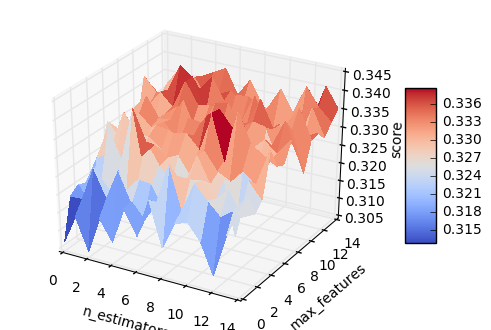

In [44]:
#Run cross validation to find optimal parameters for RFC
best_n_estimators, best_max_features, best_max_depth, max_scores = RandomForestClassifier_CrossValidation(15, len(X[0]), 7, 20)

3D array 

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [283]:
rfc = RandomForestClassifier(
    n_estimators=best_n_estimators,
    criterion='gini',  # or 'entropy' ?
    max_features=best_max_features,
    max_depth=best_max_depth,
)

In [284]:
rfc.fit(X_train,
        y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4.0, max_features=12, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [285]:
y_pred = rfc.predict(X_test)
y_compare = rfc.predict(X_train)
print(sklearn.metrics.accuracy_score(y_test, y_pred), sklearn.metrics.accuracy_score(y_train, y_compare))

0.314861460957 0.400673400673


In [286]:
rfc.feature_importances_

array([ 0.08044085,  0.04995061,  0.05727519,  0.14108663,  0.13581102,
        0.04695803,  0.05095481,  0.02517123,  0.02409618,  0.03137056,
        0.10893497,  0.1204925 ,  0.04566375,  0.03606811,  0.04572557])

In [287]:
print(np.argmax(rfc.feature_importances_))

3
